In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
RANDOM_SEED = 0x0

# TASK 1 (4 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_labels(X, kmeans: KMeans):
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    plot_labels(X,labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k')
    plt.legend()


def plot_labels(X, labels):
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=i)
    plt.legend()

In [ ]:
k = 4
kmeans = KMeans(k)
kmeans.fit(X)
labels = kmeans.predict(X)


### Task 1b

Try different numbers of clusters, compute the average silhouette scores using
`sklearn.metrics.silhouette_score` and plot the silhouette plot for the different values of K. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
scores = []

ks = range(2, 10)
for k in ks:
    kmeans = KMeans(k)
    kmeans.fit(X)
    label = kmeans.predict(X)
    scores.append(silhouette_score(X, label))

plt.plot(ks, scores)


  ### Task 1c

Select the number of clusters K using the silhouette method. Visualize the resulting clustering for in a scatter plot by using different colors for each cluster and also depicting the cluster centroids.

In [ ]:
k = 4
kmeans = KMeans(k)
kmeans.fit(X)
plot_labels(X, kmeans)

## 📢 **HAND-IN** 📢:
1. The plot of the average silhouette scores for different values of K
2. The optimal K you selected based on the plots of the silhouette scores
3. The scatter plot of the clustering results and the centroids for the optimal K

# TASK 2: DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result?

In [ ]:
k = 2
kmeans = KMeans(k)
kmeans.fit(X)
plot_labels(X, kmeans)

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you manage to obtain good clustering of the two half-moons

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
epss = [0.01, 0.1, 0.3, 0.5, 1]
min_sampless = [3, 5, 10, 15]

for eps in epss:
    for min_samples in min_sampless:
        dbscan = DBSCAN(eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        plot_labels(X, labels)
        plt.title(f'eps:{eps}- min_samples: {min_samples}')
        plt.figure()


## 📢 **HAND-IN** 📢: No submission needed for this task.

# Task 3 (6 Points): Image Compression - Color Clustering in Images

K-Means can be used for image compression. This task focuses on appling this compression technique to an image.

We provide some useful helper functions below. Read the comments in the code carefully, but do not worry if you don't understand every line.


In [ ]:
from PIL import Image
import requests
from io import BytesIO

In [ ]:
def download_img(url: str) -> Image:
    """
    This function fetches an image from the internet and returns a PIL.Image object
    see: https://pillow.readthedocs.io/en/stable/reference/Image.html
  
    we tested it mainly on images from wikimedia
    """

    # have to set a fake user-agent so we dont get blocked by wikimedia
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        # if you hit this exception, consider using another image
        raise Exception(f"download failed:\n{url}")

    return Image.open(BytesIO(r.content)).convert("RGB")


def img2arr(img: Image) -> np.array:
    """
    convert a PIL.Image object to a numpy array
    the resulting array has 3 dimensions [height, width, 3]
    the last dimension contains rgb values
  
    the rgb values are normalized to be between 0. and 1.
    """
    return np.asarray(img) / 255


def arr2img(arr: np.array) -> Image:
    """
    convert a numpy array back into a PIL.Image object
    we expect the rgb values of the array to be between 0. and 1.
    """
    return Image.fromarray((arr * 255).astype(np.int8), mode="RGB")

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"

img = download_img(img_url)

# you can visualize a PIL.Image object directly in jupyter using `display`
display(img)

img_arr = img2arr(img)

# visualize the np.array version of the same image
plt.imshow(img_arr)

In [ ]:
from typing import Optional


def rg_chromaticity(color_arr: np.array) -> np.array:
    """
    helper function
    """
    sums = np.sum(color_arr, axis=1, keepdims=True)
    normed = np.divide(color_arr, sums, where=sums > 0.)
    return normed


def rg_chroma_plot(img_arr: np.array, centers: Optional[np.array] = None):
    """
    plot an image in rg-chromaticity space
    this is a 2D representation of 3D rgb data
    refer to wikipedia for details: https://en.wikipedia.org/wiki/Rg_chromaticity
  
    Note: the resulting plot will not accurately reflect the original euclidean distances
  
    inputs:
    img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
    centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
    """
    colors = np.copy(img_arr).reshape((-1, 3))
    colors = np.unique(colors, axis=0)
    img_rg = rg_chromaticity(colors)
    plt.scatter(img_rg[:, 0], img_rg[:, 1], c=[tuple(colors[i]) for i in range(colors.shape[0])], s=.1)

    if centers is not None:
        crg = rg_chromaticity(centers)
        plt.scatter(crg[:, 0], crg[:, 1], c="black", marker="x", s=25.)

    plt.xlabel("red")
    plt.ylabel("green")
    plt.show()


In [ ]:
rg_chroma_plot(img_arr)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin


def replace_nearest_color(img_arr: np.array, centers: np.array):
    """
    replace each pixel color in `img_arr` by the closest color in `centers`
  
    input:
    img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
    centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
    """
    colors = img_arr.reshape((-1, 3))
    labels = pairwise_distances_argmin(colors, centers)
    compressed = labels.reshape(img_arr.shape[:2])
    replaced = centers[compressed]
    return replaced


In [ ]:
# generate 8 random colors for illustration
random_centers = np.random.default_rng(RANDOM_SEED).random(size=(8, 3))

# plot the random centers on top of the colors of the image
rg_chroma_plot(img_arr, random_centers)

# replace original colors by their nearest neighbors out of the candidate centers
replaced = replace_nearest_color(img_arr, random_centers)

# convert to PIL.Image and visualize
display(arr2img(replaced))

### Task 3 (continued)

* Use an image from [wikimedia](https://commons.wikimedia.org/wiki/Main_Page) to compress. Make sure that it is not too big, e.g. less than 1000px per side

* You can also use the same image we used in the example above

* download the image and convert it to a numpy array using the functions `download_img` and `img2arr` we defined above  

* Cluster the colors in the image using `KMeans`

* Choose the appropriate hyperparameters and verify them (e.g. using `silhouette_score` or the elbow method)

* Visualize your final cluster centers using `rg_chroma_plot` (see example usage above)

* Replace the colors of the original image by their nearest center using `replace_nearest_color` and display the result (see example usage above)

### Tips

* The images have 3 dimensions but the clustering algorithms expect 2. You can use [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to obtain the dimension you need.
* To download the images you can right-click and save them to your computer.

C:\Users\Carla\Documents\ZHAW\mldm\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Carla\Documents\ZHAW\mldm\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Carla\Documents\ZHAW\mldm\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Carla\Documents\ZHAW\mldm\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

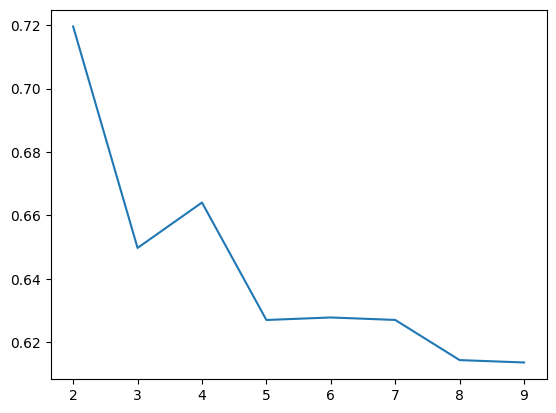

In [62]:
img = download_img("https://upload.wikimedia.org/wikipedia/commons/1/11/MyBouquet.jpg")
array3d = img2arr(img)
array2d = array3d.reshape((-1, 3))
scores = []
ks = range(2,10)
for k in ks:
    kmeans  = KMeans(k)
    kmeans.fit_predict(array2d)
    scores.append(silhouette_score(X=array2d, labels=kmeans.labels_))

plt.plot(ks, scores)


In [63]:
k=ks[max(range(len(scores)), key=scores.__getitem__)]

C:\Users\Carla\Documents\ZHAW\mldm\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


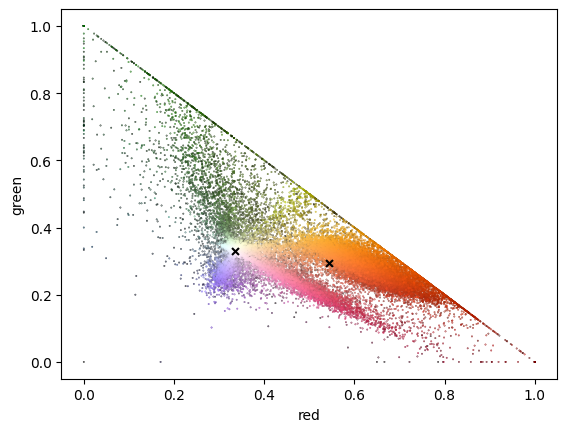

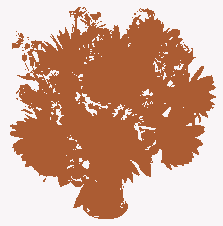

In [64]:
kmeans  = KMeans(k)
kmeans.fit_predict(array2d)
rg_chroma_plot(array3d, kmeans.cluster_centers_)
replaced = replace_nearest_color(array3d, kmeans.cluster_centers_)
display(arr2img(replaced))


## 📢 **HAND-IN** 📢:

* The original image you used for this task if different than the example image

* The final (compressed) image showing the replaced colors

* Your code for computing the clustering

* Short (2-3 sentences) description on how you verified the clustering and selected the hyperparameters
